<a href="https://colab.research.google.com/github/m5532m5532/DL_hw2/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 50
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [ ]:

# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))


In [ ]:

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/50
800/800 [==============================] - 55s 68ms/step - loss: 1.8279 - accuracy: 0.3159 - val_loss: 1.3535 - val_accuracy: 0.5101
Epoch 2/50
800/800 [==============================] - 52s 65ms/step - loss: 1.2656 - accuracy: 0.5447 - val_loss: 1.1387 - val_accuracy: 0.6015
Epoch 3/50
800/800 [==============================] - 52s 65ms/step - loss: 1.0830 - accuracy: 0.6114 - val_loss: 1.0353 - val_accuracy: 0.6412
Epoch 4/50
800/800 [==============================] - 51s 64ms/step - loss: 0.9539 - accuracy: 0.6615 - val_loss: 1.0273 - val_accuracy: 0.6387
Epoch 5/50
800/800 [==============================] - 51s 64ms/step - loss: 0.8223 - accuracy: 0.7108 - val_loss: 0.9394 - val_accuracy: 0.6719
Epoch 6/50
800/800 [==============================] - 51s 64ms/step - loss: 0.7541 - accuracy: 0.7388 - val_loss: 0.9048 - val_accuracy: 0.6871
Epoch 7/50
800/800 [==============================] - 52s 65ms/step - loss: 0.6776 - accuracy: 0.7662 - val_loss: 0.8689 - val_accuracy:

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.543962240219116 / Test accuracy: 0.6769000291824341


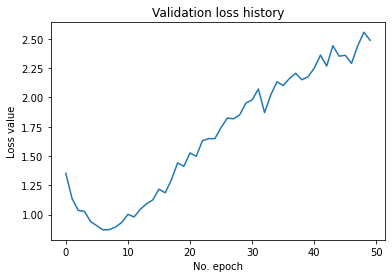

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

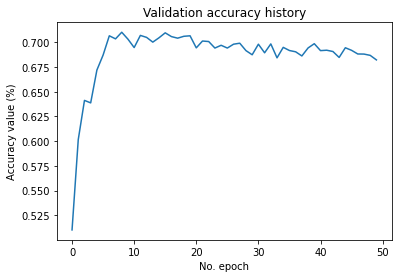

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:

# save model
model.save('cifa10.h5')


In [ ]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [ ]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('/content/drive/MyDrive/colab/Colab Notebooks/機器學習資料二/aeroplane_s_000002.png')
    # load model
    model = load_model('cifa10.h5')
    # predict the class
    result = model.predict_classes(img)
    print(result)

run_example()

[8]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


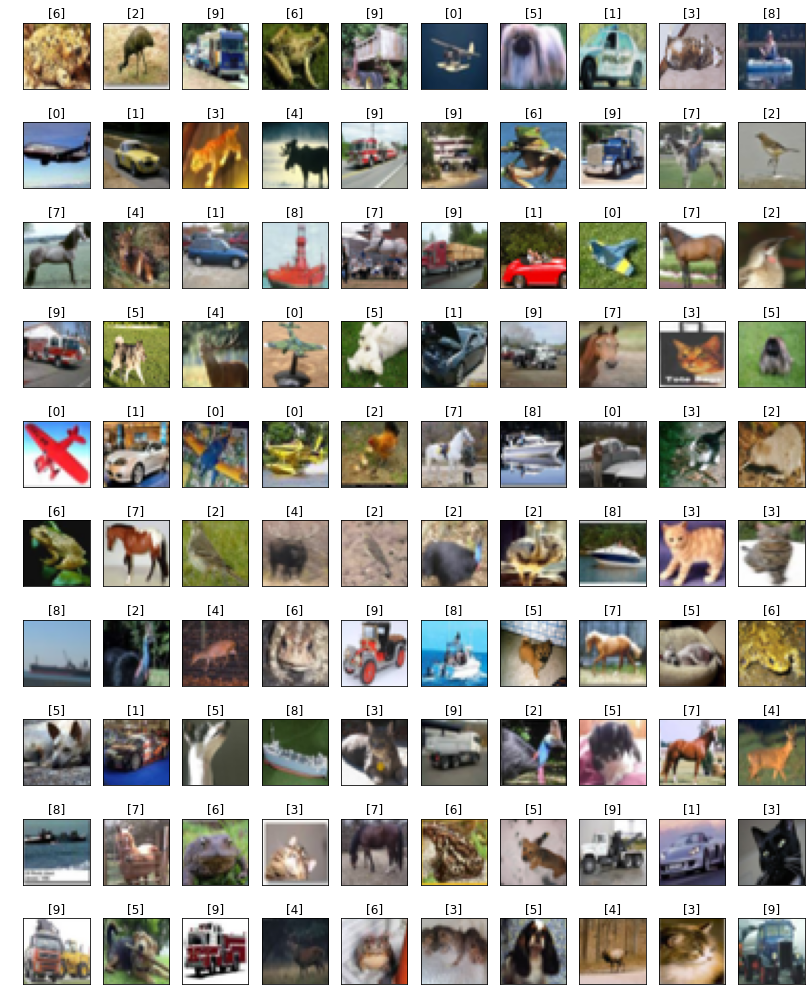

In [28]:
import numpy as np
# Show sample random image 14x18
plt.figure(figsize=(14,18))
for i in range(100):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(10,10,i+1)
    plt.imshow(input_train[rand_num])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
    # Show correct label
    plt.title(target_train[rand_num])